<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/14th_May_2025_Boston_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# importÎ•º Îã§Î•∏Í±∏Î°ú Î∞îÍøîÏ£ºÍ≥†
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# Ïù¥ Î∂ÄÎ∂Ñ ÎëêÍ∞úÍ∞Ä Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Î°ú ÎêòÏñ¥ÏûàÏñ¥ÏÑú ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÏÑ∏Ïöî!
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')

# boston datasetÏùò target arrayÎäî Ï£ºÌÉù Í∞ÄÍ≤©ÏûÑ. Ïù¥Î•º PRICE Ïª¨ÎüºÏúºÎ°ú DataFrameÏóê Ï∂îÍ∞ÄÌï®.
bostonDF['PRICE'] = boston.target
print('Boston Îç∞Ïù¥ÌÉÄÏÖã ÌÅ¨Í∏∞ :',bostonDF.shape)
bostonDF.head()

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


Boston Îç∞Ïù¥ÌÉÄÏÖã ÌÅ¨Í∏∞ : (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [3]:
bostonDF.info()
# NULL Í∞íÏùÄ ÏóÜÏúºÎ©∞, Î™®Îëê float ÌòïÏûÑ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


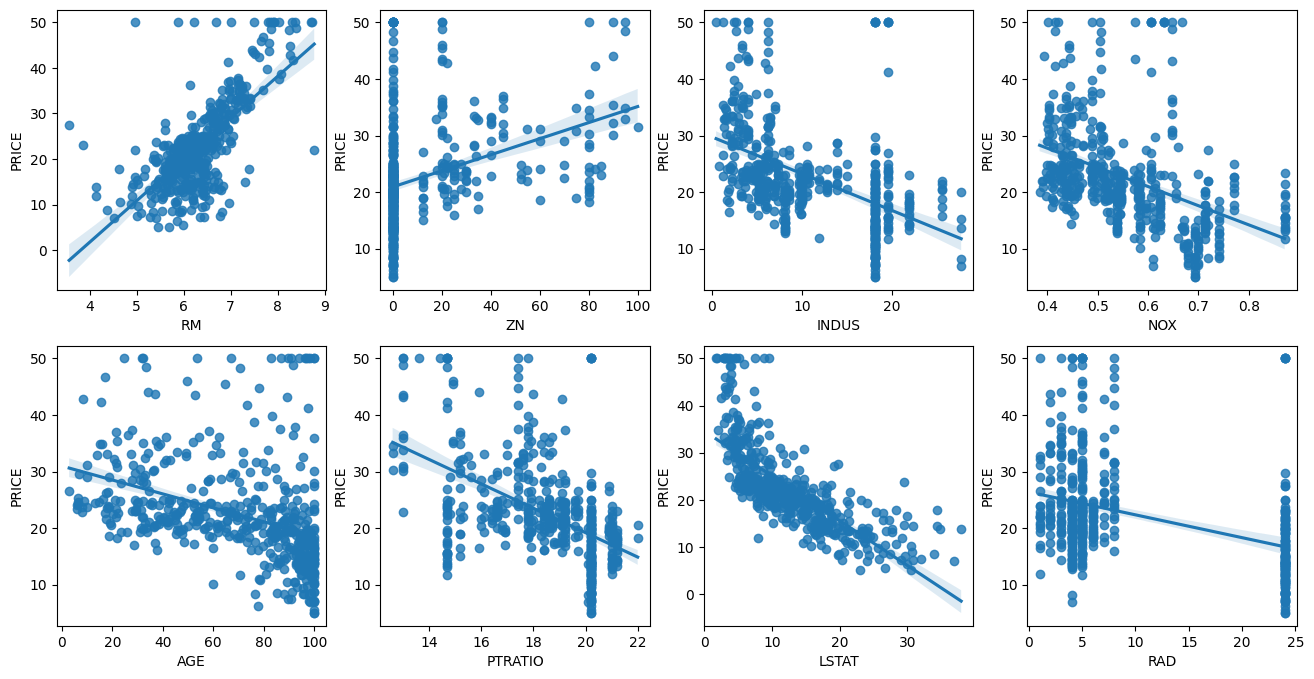

In [5]:
# 2Í∞úÏùò ÌñâÍ≥º 4Í∞úÏùò Ïó¥ÏùÑ Í∞ÄÏßÑ subplotÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§. Ï†ÑÏ≤¥ figure ÌÅ¨Í∏∞Îäî (16, 8)ÏûÖÎãàÎã§.
# axsÎäî 2x4 (Ï¶â, 8Í∞ú)Ïùò subplot axesÎ•º Ìè¨Ìï®ÌïòÎäî 2Ï∞®Ïõê Î∞∞Ïó¥ÏûÖÎãàÎã§.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

# ÌöåÍ∑Ä Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò(Î≥ÄÏàò) Ïù¥Î¶ÑÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ïÏùòÌï©ÎãàÎã§.
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

# enumerateÎ°ú ÌîºÏ≤ò Î¶¨Ïä§Ìä∏Î•º ÏàúÌöåÌïòÎ©¥ÏÑú Í∞Å ÌîºÏ≤òÏùò Ïù∏Îç±Ïä§(i)ÏôÄ Ïù¥Î¶Ñ(feature)Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
for i, feature in enumerate(lm_features):
    row = int(i / 4)        # subplotÏùò Ìñâ ÏúÑÏπòÎ•º Í≥ÑÏÇ∞ (4Í∞úÏî© Ìïú Ï§ÑÏù¥ÎØÄÎ°ú)
    col = i % 4             # subplotÏùò Ïó¥ ÏúÑÏπòÎ•º Í≥ÑÏÇ∞

    # seabornÏùò regplotÏùÑ ÏÇ¨Ïö©Ìï¥ Í∞Å ÌîºÏ≤ò(feature)ÏôÄ Ï£ºÌÉù Í∞ÄÍ≤©(PRICE) ÏÇ¨Ïù¥Ïùò ÏÇ∞Ï†êÎèÑÏôÄ ÌöåÍ∑ÄÏÑ†ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
    # Í∞Å subplot(axs[row][col])Ïóê Í∑∏Î†§ ÎÑ£ÏäµÎãàÎã§.
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

# ÌòÑÏû¨Ïùò figure Í∞ùÏ≤¥Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
fig1 = plt.gcf()

# ÌòÑÏû¨ figure(fig1)Î•º TIFF Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
# Ìï¥ÏÉÅÎèÑÎäî 300dpi, bbox_inches='tight'Îäî Ïó¨Î∞±ÏùÑ ÏµúÏÜåÌôîÌï¥ Ï†ÄÏû•Ìï©ÎãàÎã§.
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')


# RM Í∑∏Î¶¨Í≥† LSTATÏùò PRICE ÏòÅÌñ•Ïù¥ Í∞ÄÏû• ÎëêÎìúÎü¨ÏßÄÍ≤å ÎÇòÌÉÄÎÇ®

ÌöåÍ≥Ñ Î™®Îç∏ ÎèåÎ¶¨Í∏∞ Ï†ÑÏóê Í∞Å ÏπºÎüºÏù¥ ÌöåÍ∑Ä Í≤∞Í≥ºÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ Ïñ¥Îäê Ï†ïÎèÑÏù∏ÏßÄ ÏãúÍ∞ÅÌôî ÌïòÍ∏∞

# Î≥¥Ïä§ÌÑ¥ Ï£ºÌÉù Í∞ÄÍ≤©Ïùò ÌöåÍ∑Ä Î™®Îç∏ ÎßåÎì§Í∏∞

In [6]:
from sklearn.model_selection import train_test_split   # Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï† Ìï®Ïàò
from sklearn.linear_model import LinearRegression      # ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏
from sklearn.metrics import mean_squared_error, r2_score  # ÌèâÍ∞Ä ÏßÄÌëú

# Î™©Ìëú Î≥ÄÏàò(y)Îäî 'PRICE' Ïª¨Îüº
y_target = bostonDF['PRICE']

# ÏûÖÎ†• Î≥ÄÏàò(X)Îäî 'PRICE' Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ (ÏÉàÎ°úÏö¥ DataFrameÏúºÎ°ú Î≥µÏÇ¨)
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î•º 70:30 ÎπÑÏú®Î°ú Î∂ÑÎ¶¨, ÏãúÎìúÍ∞íÏùÄ 156ÏúºÎ°ú Í≥†Ï†ï (Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± ÏúÑÌï¥)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ±
lr = LinearRegression()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ ÌïôÏäµ
lr.fit(X_train, y_train)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÍ≤© ÏòàÏ∏° ÏàòÌñâ
y_preds = lr.predict(X_test)

# ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®(MSE) Í≥ÑÏÇ∞
mse = mean_squared_error(y_test, y_preds)

# ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®(RMSE): ÏòàÏ∏°Í∞íÏùò Ïò§Ï∞®Ïùò ÌÅ¨Í∏∞Î•º Ïã§Ï†ú Îã®ÏúÑÎ°ú ÌôòÏÇ∞Ìïú ÏßÄÌëú
rmse = np.sqrt(mse)

# Í≤∞Í≥º Ï∂úÎ†•: MSEÏôÄ RMSE
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

# Í≤∞Ï†ï Í≥ÑÏàò(R^2 Score): 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Î™®Îç∏
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [7]:
print('Ï†àÌé∏ Í∞í:',lr.intercept_)
print('ÌöåÍ∑Ä Í≥ÑÏàòÍ∞í:', np.round(lr.coef_, 1))

Ï†àÌé∏ Í∞í: 40.995595172164826
ÌöåÍ∑Ä Í≥ÑÏàòÍ∞í: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
# ÌöåÍ∑Ä Í≥ÑÏàòÎ•º ÌÅ∞ Í∞í ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞ ÏúÑÌï¥ SeriesÎ°ú ÏÉùÏÑ±. indexÍ∞Ä ÏπºÎüºÎ™ÖÏóê Ïú†Ïùò
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [9]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )Î°ú 5 Fold ÏÖãÏúºÎ°ú MSE Î•º Íµ¨Ìïú Îí§ Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú Îã§Ïãú  RMSE Íµ¨Ìï®.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")Î°ú Î∞òÌôòÎêú Í∞íÏùÄ Î™®Îëê ÏùåÏàò
print(' 5 folds Ïùò Í∞úÎ≥Ñ Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds Ïùò Í∞úÎ≥Ñ RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds Ïùò ÌèâÍ∑† RMSE : {0:.3f} '.format(avg_rmse))

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏùÄ ÏùåÏàòÎ°ú ÎßåÎì§Ïñ¥Ï§òÏïº MSEÍ∞Ä ÎÇÆÏùÑ ÏàòÎ°ù ÎÜíÎã§Îäî logic Í≥º ÎßûÏùå
# ÏÇ¨Ïù¥ÌÇ∑Îü∞ - ÍµêÏ∞®Í≤ÄÏ¶ù, Ïó¨Îü¨Ï°∞Í∞ÅÏúºÎ°ú ÎÇòÎàà ÌõÑ ÌèâÍ∞Ä/ ÌïôÏäµ/ ÌèâÍ∑†

 5 folds Ïùò Í∞úÎ≥Ñ Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds Ïùò Í∞úÎ≥Ñ RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds Ïùò ÌèâÍ∑† RMSE : 5.829 


# Îã§Ìï≠ ÌöåÍ∑ÄÏôÄ Í≥º(ÎåÄ)Ï†ÅÌï©/ Í≥ºÏÜå Ï†ÅÌï©Ïùò Ïù¥Ìï¥

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Îã§Ìï≠ÏãùÏúºÎ°ú Î≥ÄÌôòÌïú Îã®Ìï≠Ïãù ÏÉùÏÑ±, [[0,1],[2,3]]Ïùò 2X2 ÌñâÎ†¨ ÏÉùÏÑ±
X = np.arange(4).reshape(2,2)
print('ÏùºÏ∞® Îã®Ìï≠Ïãù Í≥ÑÏàò feature:\n',X )

# degree = 2 Ïù∏ 2Ï∞® Îã§Ìï≠ÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï¥ PolynomialFeaturesÎ•º Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÌôò
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('Î≥ÄÌôòÎêú 2Ï∞® Îã§Ìï≠Ïãù Í≥ÑÏàò feature:\n', poly_ftr)

ÏùºÏ∞® Îã®Ìï≠Ïãù Í≥ÑÏàò feature:
 [[0 1]
 [2 3]]
Î≥ÄÌôòÎêú 2Ï∞® Îã§Ìï≠Ïãù Í≥ÑÏàò feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
import numpy as np

# Îã§Ìï≠Ïãù Ìï®Ïàò Ï†ïÏùò: XÎäî 2Ï∞®Ïõê Î∞∞Ïó¥, Í∞Å ÌñâÏùÄ [x1, x2]
def polynomial_func(X):
    # y = 1 + 2*x1 + 3*x1^2 + 4*x2^3 ÌòïÌÉúÏùò Îã§Ìï≠Ïãù Í≥ÑÏÇ∞
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print("X[:, 0] (Ï≤´ Î≤àÏß∏ feature):", X[:, 0])
    print("X[:, 1] (Îëê Î≤àÏß∏ feature):", X[:, 1])
    return y

# 0Î∂ÄÌÑ∞ 3ÍπåÏßÄ Ïà´ÏûêÎ•º 2Ìñâ 2Ïó¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôò ‚Üí Ï¥ù 2Í∞úÏùò ÏÉòÌîå, Í∞Å ÏÉòÌîåÏùÄ feature 2Í∞ú
X = np.arange(0, 4).reshape(2, 2)
print('ÏùºÏ∞® Îã®Ìï≠Ïãù Í≥ÑÏàò feature: \n', X)

# Îã§Ìï≠Ïãù Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í≤∞Í≥º Í≥ÑÏÇ∞
y = polynomial_func(X)
print('ÏÇºÏ∞® Îã§Ìï≠Ïãù Í≤∞Ï†ïÍ∞í: \n', y)


ÏùºÏ∞® Îã®Ìï≠Ïãù Í≥ÑÏàò feature: 
 [[0 1]
 [2 3]]
X[:, 0] (Ï≤´ Î≤àÏß∏ feature): [0 2]
X[:, 1] (Îëê Î≤àÏß∏ feature): [1 3]
ÏÇºÏ∞® Îã§Ìï≠Ïãù Í≤∞Ï†ïÍ∞í: 
 [  5 125]


In [12]:
# 3 Ï∞® Îã§Ìï≠Ïãù Î≥ÄÌôò
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3Ï∞® Îã§Ìï≠Ïãù Í≥ÑÏàò feature: \n',poly_ftr)

# Linear RegressionÏóê 3Ï∞® Îã§Ìï≠Ïãù Í≥ÑÏàò featureÏôÄ 3Ï∞® Îã§Ìï≠Ïãù Í≤∞Ï†ïÍ∞íÏúºÎ°ú ÌïôÏäµ ÌõÑ ÌöåÍ∑Ä Í≥ÑÏàò ÌôïÏù∏
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial ÌöåÍ∑Ä Í≥ÑÏàò\n' , np.round(model.coef_, 2))
print('Polynomial ÌöåÍ∑Ä Shape :', model.coef_.shape)

3Ï∞® Îã§Ìï≠Ïãù Í≥ÑÏàò feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial ÌöåÍ∑Ä Í≥ÑÏàò
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial ÌöåÍ∑Ä Shape : (10,)


In [14]:
from sklearn.preprocessing import PolynomialFeatures       # Îã§Ìï≠Ïãù ÌäπÏÑ± Î≥ÄÌôòÍ∏∞
from sklearn.linear_model import LinearRegression          # ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏
from sklearn.pipeline import Pipeline                      # Ï†ÑÏ≤òÎ¶¨ + Î™®Îç∏ÏùÑ Ïó∞Í≤∞ÌïòÎäî ÌååÏù¥ÌîÑÎùºÏù∏ ÎèÑÍµ¨
import numpy as np

# Îã§Ìï≠Ïãù Ìï®Ïàò Ï†ïÏùò: y = 1 + 2*x1 + 3*x1^2 + 4*x2^3
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3             # Îã§Ìï≠Ïãù Í≥ÑÏÇ∞
    return y

# PipelineÏúºÎ°ú Îã§Ìï≠Ïãù Î≥ÄÌôò + ÏÑ†Ìòï ÌöåÍ∑ÄÎ•º Ïó∞Í≤∞
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),                # x1, x2Î•º ÏµúÎåÄ 3Ï∞® Îã§Ìï≠Ïãù Ìï≠Îì§Î°ú ÌôïÏû•
    ('linear', LinearRegression())                         # ÌôïÏû•Îêú featureÎ°ú ÏÑ†Ìòï ÌöåÍ∑Ä ÏàòÌñâ
])

X = np.arange(4).reshape(2,2)                               # X: 0~3ÍπåÏßÄ Ïà´ÏûêÎ•º 2Ìñâ 2Ïó¥Î°ú Íµ¨ÏÑ± ‚Üí [[0,1],[2,3]]
y = polynomial_func(X)                                     # Îã§Ìï≠Ïãù Ìï®ÏàòÎ°ú ÌÉÄÍπÉ y Í≥ÑÏÇ∞ ‚Üí [5, 125]

model = model.fit(X, y)                                    # Pipeline Ï†ÑÏ≤¥ ÌïôÏäµ: (1) Îã§Ìï≠Ïãù Î≥ÄÌôò ‚Üí (2) ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ

# ÌïôÏäµÎêú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïùò ÌöåÍ∑Ä Í≥ÑÏàò Ï∂úÎ†• (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º)
print('Polynomial ÌöåÍ∑Ä Í≥ÑÏàò\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial ÌöåÍ∑Ä Í≥ÑÏàò
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# ÏûÑÏùòÏùò Í∞íÏúºÎ°ú Íµ¨ÏÑ±Îêú XÍ∞íÏóê ÎåÄÌï¥ ÏΩîÏÇ¨Ïù∏ Î≥ÄÌôò Í∞íÏùÑ Î∞òÌôò.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# XÎäî 0Î∂ÄÌÑ∞ 1ÍπåÏßÄ 30Í∞úÏùò ÏûÑÏùòÏùò Í∞íÏùÑ ÏàúÏÑúÎåÄÎ°ú ÏÉòÌîåÎßÅÌïú Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y Í∞íÏùÄ ÏΩîÏÇ¨Ïù∏ Í∏∞Î∞òÏùò true_fun()ÏóêÏÑú ÏïΩÍ∞ÑÏùò ÎÖ∏Ïù¥Ï¶à Î≥ÄÎèô Í∞íÏùÑ ÎçîÌïú Í∞íÏûÖÎãàÎã§.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

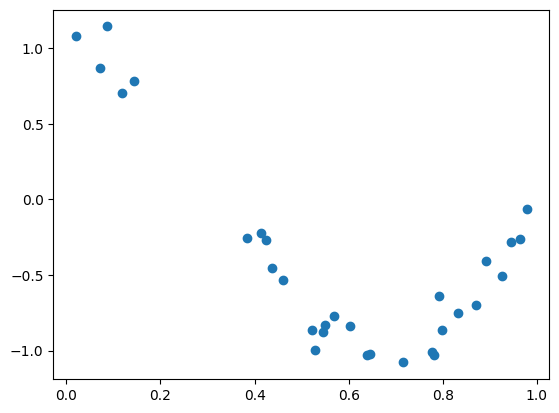

In [16]:
plt.scatter(X, y)



Degree 1 ÌöåÍ∑Ä Í≥ÑÏàòÎäî [-1.61] ÏûÖÎãàÎã§.
Degree 1 MSE Îäî 0.4077 ÏûÖÎãàÎã§.

Degree 4 ÌöåÍ∑Ä Í≥ÑÏàòÎäî [  0.47 -17.79  23.59  -7.26] ÏûÖÎãàÎã§.
Degree 4 MSE Îäî 0.0432 ÏûÖÎãàÎã§.

Degree 15 ÌöåÍ∑Ä Í≥ÑÏàòÎäî [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] ÏûÖÎãàÎã§.
Degree 15 MSE Îäî 181238256.5642 ÏûÖÎãàÎã§.


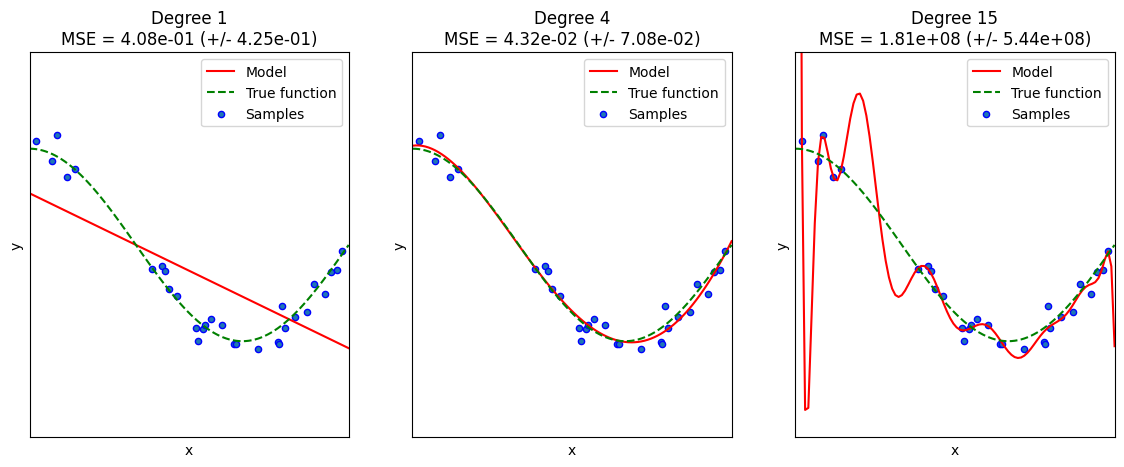

In [17]:
plt.figure(figsize=(14, 5))            # Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
degrees = [1, 4, 15]                   # ÎπÑÍµêÌï† Îã§Ìï≠Ïãù Ï∞®Ïàò

# Í∞Å Ï∞®ÏàòÏóê ÎåÄÌï¥ Î∞òÎ≥µ
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  # 1Ìñâ 3Ïó¥ subplot Ï§ë i+1Î≤àÏß∏
    plt.setp(ax, xticks=(), yticks=())       # x/y Ï∂ï ÎààÍ∏à Ï†úÍ±∞Î°ú ÍπîÎÅîÌïòÍ≤å

    # Pipeline Íµ¨ÏÑ±: Îã§Ìï≠ ÌäπÏÑ± ÏÉùÏÑ± + ÏÑ†Ìòï ÌöåÍ∑Ä
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    # Î™®Îç∏ ÌïôÏäµ (XÎäî reshape ÌïÑÏöî: (n_samples, 1))
    pipeline.fit(X.reshape(-1, 1), y)

    # ÍµêÏ∞® Í≤ÄÏ¶ù (CV=10): Î™®Îç∏ ÏùºÎ∞òÌôî ÏÑ±Îä• ÌôïÏù∏
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y,
                             scoring="neg_mean_squared_error", cv=10)

    # ÌöåÍ∑Ä Í≥ÑÏàò ÌôïÏù∏
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} ÌöåÍ∑Ä Í≥ÑÏàòÎäî {1} ÏûÖÎãàÎã§.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE Îäî {1:.4f} ÏûÖÎãàÎã§.'.format(degrees[i], -1*np.mean(scores)))

    # ÏòàÏ∏° Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞ ÏúÑÌïú ÌÖåÏä§Ìä∏ X (100Í∞úÎ°ú Í∑†Îì± Î∂ÑÌï†)
    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])  # Î™®Îç∏ ÏòàÏ∏° ÏàòÌñâ

    # ÏòàÏ∏° ÏÑ†
    plt.plot(X_test, y_pred, label="Model", color='red')
    # Ïã§Ï†ú Ìï®Ïàò (ÏßÑÏßú Ï†ïÎãµ)
    plt.plot(X_test, true_fun(X_test), '--', label="True function", color='green')
    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ê
    plt.scatter(X, y, edgecolor='blue', s=20, label="Samples")

    # ÏãúÍ∞ÅÌôî ÏöîÏÜå ÏÑ§Ï†ï
    plt.xlabel("x"); plt.ylabel("y")
    plt.xlim((0, 1)); plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e} (+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.show()

| Í∏∞Îä•                     | ÏÑ§Î™Ö                         |
| ---------------------- | -------------------------- |
| `degrees = [1, 4, 15]` | Îã§Ìï≠ÏãùÏùò Ï∞®ÏàòÎ•º Î∞îÍæ∏Î©∞ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê      |
| `Pipeline`             | Îã§Ìï≠ ÌäπÏÑ± ÏÉùÏÑ± + ÏÑ†Ìòï ÌöåÍ∑ÄÎ•º ÍπîÎÅîÌïòÍ≤å Ïó∞Í≤∞  |
| `cross_val_score`      | Î™®Îç∏Ïùò ÌèâÍ∑† MSE(ÏùåÏàòÍ∞í)Î°ú ÏùºÎ∞òÌôî Îä•Î†• ÌèâÍ∞Ä |
| `subplot + plot`       | Í∞Å Ï∞®ÏàòÎ≥Ñ ÌöåÍ∑Ä Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÎπÑÍµê      |
| `true_fun`             | Î™®Îç∏Ïù¥ Í∑ºÏÇ¨Ìï¥Ïïº Ìï† "ÏßÑÏßú Í≥°ÏÑ†" Ï†ïÏùò      |


# Regularized Linear Model - Ridge Regression

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge                    # Î¶øÏßÄ ÌöåÍ∑Ä Î™®Îç∏
from sklearn.model_selection import cross_val_score       # ÍµêÏ∞® Í≤ÄÏ¶ù ÎèÑÍµ¨
from sklearn.datasets import fetch_openml                 # Ïô∏Î∂Ä Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú

# Boston Housing Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú (Ï£ºÏùò: fetch_openmlÏùÄ Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞ ÌïÑÏöî)
boston = fetch_openml(name='boston', version=1, as_frame=True)

# featureÎì§ÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôò
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# üîÑ 'RAD', 'CHAS'Í∞Ä object ÌÉÄÏûÖÏùº Ïàò ÏûàÏúºÎØÄÎ°ú ÏàòÏπòÌòïÏúºÎ°ú Í∞ïÏ†ú Î≥ÄÌôò (coerce: Ïã§Ìå® Ïãú NaN)
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')

# target Îç∞Ïù¥ÌÑ∞Î•º PRICE Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä
bostonDF['PRICE'] = boston.target

# ÌîºÏ≤ò(X), ÌÉÄÍ≤ü(y) Î∂ÑÎ¶¨
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# Î¶øÏßÄ ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± (Í∑úÏ†ú Í∞ïÎèÑ alpha=10)
ridge = Ridge(alpha=10)

# 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú MSE Í≥ÑÏÇ∞ (ÏùåÏàòÎ°ú Î∞òÌôòÎê® ‚Üí ÏùåÏàò Ï†úÍ±∞ ÌõÑ sqrt)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                 scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)               # RMSE Í≥ÑÏÇ∞
avg_rmse = np.mean(rmse_scores)                          # ÌèâÍ∑† RMSE Í≥ÑÏÇ∞

# Í≤∞Í≥º Ï∂úÎ†•
print('5 folds Ïùò Í∞úÎ≥Ñ Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds Ïùò Í∞úÎ≥Ñ RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds Ïùò ÌèâÍ∑† RMSE : {0:.3f}'.format(avg_rmse))


5 folds Ïùò Í∞úÎ≥Ñ Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds Ïùò Í∞úÎ≥Ñ RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds Ïùò ÌèâÍ∑† RMSE : 5.518


# alphaÍ∞íÏùÑ 0 , 0.1 , 1 , 10 , 100 ÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÎ©¥ÏÑú RMSE Ï∏°Ï†ï

In [21]:
# Î¶øÏßÄÏóê ÏÇ¨Ïö©Îê† alpha ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÏùÑ Ï†ïÏùò
alphas = [0, 0.1, 1, 10, 100]

# alphas list Í∞íÏùÑ Î∞òÎ≥µÌïòÎ©¥ÏÑú alphaÏóê Îî∞Î•∏ ÌèâÍ∑† rmseÎ•º Íµ¨Ìï®.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_scoreÎ•º Ïù¥Ïö©Ìï¥ 5 Ìè¥ÎìúÏùò ÌèâÍ∑† RMSEÎ•º Í≥ÑÏÇ∞
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} Ïùº Îïå 5 folds Ïùò ÌèâÍ∑† RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 Ïùº Îïå 5 folds Ïùò ÌèâÍ∑† RMSE : 5.829 
alpha 0.1 Ïùº Îïå 5 folds Ïùò ÌèâÍ∑† RMSE : 5.788 
alpha 1 Ïùº Îïå 5 folds Ïùò ÌèâÍ∑† RMSE : 5.653 
alpha 10 Ïùº Îïå 5 folds Ïùò ÌèâÍ∑† RMSE : 5.518 
alpha 100 Ïùº Îïå 5 folds Ïùò ÌèâÍ∑† RMSE : 5.330 


# Í∞Å alphaÏóê Îî∞Î•∏ ÌöåÍ∑Ä Í≥ÑÏàò Í∞íÏùÑ ÏãúÍ∞ÅÌôî. Í∞Å alphaÍ∞í Î≥ÑÎ°ú plt.subplotsÎ°ú Îß∑ÌîåÎ°ØÎ¶Ω Ï∂ï ÏÉùÏÑ±

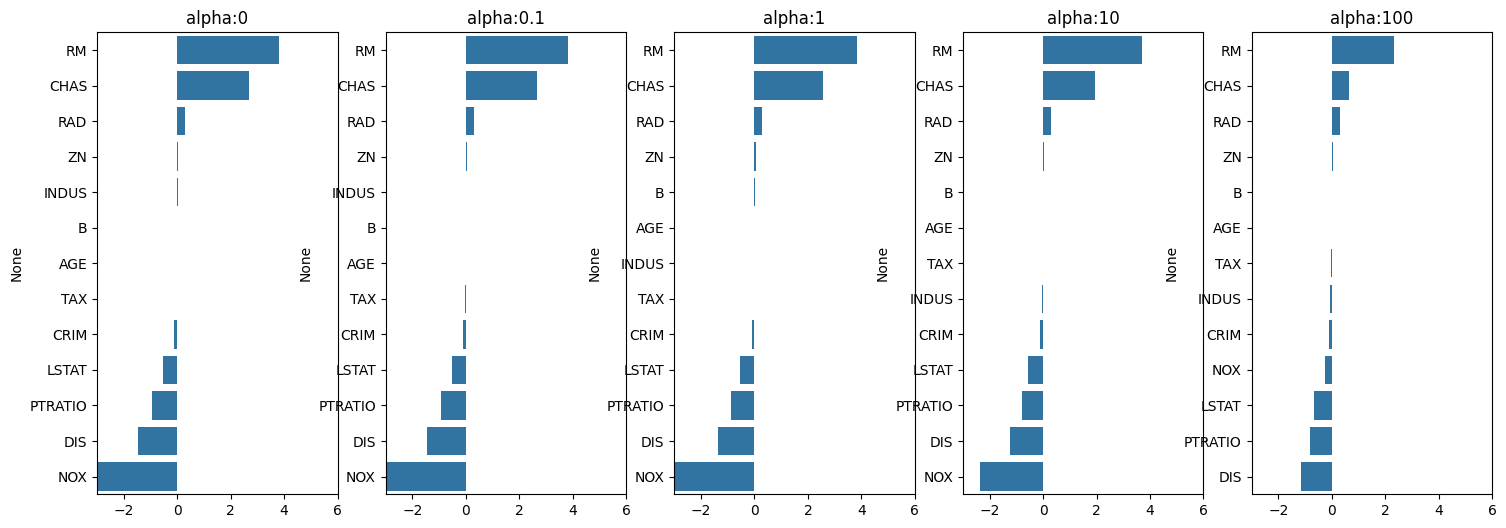

In [22]:
# Í∞Å alphaÏóê Îî∞Î•∏ ÌöåÍ∑Ä Í≥ÑÏàò Í∞íÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ 5Í∞úÏùò Ïó¥Î°ú Îêú Îß∑ÌîåÎ°ØÎ¶Ω Ï∂ï ÏÉùÏÑ±
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# Í∞Å alphaÏóê Îî∞Î•∏ ÌöåÍ∑Ä Í≥ÑÏàò Í∞íÏùÑ Îç∞Ïù¥ÌÑ∞Î°ú Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú DataFrame ÏÉùÏÑ±
coeff_df = pd.DataFrame()

# alphas Î¶¨Ïä§Ìä∏ Í∞íÏùÑ Ï∞®Î°ÄÎ°ú ÏûÖÎ†•Ìï¥ ÌöåÍ∑Ä Í≥ÑÏàò Í∞í ÏãúÍ∞ÅÌôî Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•. posÎäî axisÏùò ÏúÑÏπò ÏßÄÏ†ï
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alphaÏóê Îî∞Î•∏ ÌîºÏ≤òÎ≥Ñ ÌöåÍ∑Ä Í≥ÑÏàòÎ•º SeriesÎ°ú Î≥ÄÌôòÌïòÍ≥† Ïù¥Î•º DataFrameÏùò Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä.
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú Í∞Å alpha Í∞íÏóêÏÑúÏùò ÌöåÍ∑Ä Í≥ÑÏàòÎ•º ÏãúÍ∞ÅÌôî. ÌöåÍ∑Ä Í≥ÑÏàòÍ∞íÏù¥ ÎÜíÏùÄ ÏàúÏúºÎ°ú ÌëúÌòÑ
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for Î¨∏ Î∞îÍπ•ÏóêÏÑú Îß∑ÌîåÎ°ØÎ¶ΩÏùò show Ìò∏Ï∂ú Î∞è alphaÏóê Îî∞Î•∏ ÌîºÏ≤òÎ≥Ñ ÌöåÍ∑Ä Í≥ÑÏàòÎ•º DataFrameÏúºÎ°ú ÌëúÏãú
plt.show()

In [23]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.809865   3.818233   3.854000  3.702272   2.334536
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
B         0.009312   0.009368   0.009673  0.010037   0.009393
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847

 | Í≥ÑÏàò Î≥ÄÌôî      | ÏùòÎØ∏               | Ïû•Ï†ê            | Îã®Ï†ê                 |
| ---------- | ---------------- | ------------- | ------------------ |
| **ÏûëÏïÑÏßê**    | Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•Ïù¥ Ï§ÑÍ±∞ÎÇò Î¨¥ÏãúÎê® | Í≥ºÏ†ÅÌï© Î∞©ÏßÄ, ÏïàÏ†ïÏÑ± ‚Üë | ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßà ÏàòÎèÑ ÏûàÏùå      |
| **ÌÅ¨Í≥† Îã§ÏñëÌï®** | Î≥ÄÏàòÎßàÎã§ ÏòÅÌñ•Î†•Ïù¥ ÎöúÎ†∑     | Îçî ÎßéÏùÄ ÏÑ§Î™ÖÎ†•      | Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ± ‚Üë, Î∂àÏïàÏ†ïÌïú Í≥ÑÏàò |


ü§î Í∑∏Îüº Ïñ¥Îñ§ alphaÍ∞Ä Ï¢ãÏùÄ Í±∏Íπå?
üî• **ÎãµÏùÄ ‚ÄúÌöåÍ∑Ä Í≥ÑÏàòÍ∞Ä ÏûëÎã§Í≥† Î¨¥Ï°∞Í±¥ Ï¢ãÏùÄ Í≤å ÏïÑÎãàÎùº, ÏùºÎ∞òÌôî ÏÑ±Îä•(RMSE Îì±)Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ ÏïåÌååÎ•º ÏÑ†ÌÉùÌï¥Ïïº ÌïúÎã§‚Äù**ÏûÖÎãàÎã§.

‚úîÔ∏è ÏÑ†ÌÉù Í∏∞Ï§ÄÏùÄ Î∂ÑÏÑùÍ∞ÄÏùò Ï†ÑÎûµÏóê Îî∞Îùº ÏïÑÎûò Ï§ë ÌïòÎÇò:
ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä Ïö∞ÏÑ†:

cross_val_score()Î°ú Í∞Å alphaÏóê ÎåÄÌï¥ RMSE Í≥ÑÏÇ∞ ÌõÑ RMSEÍ∞Ä ÏµúÏÜåÏù∏ alpha ÏÑ†ÌÉù

Ìï¥ÏÑùÎ†•Í≥º Îã®ÏàúÌï®Ïù¥ Ïö∞ÏÑ†:

ÌöåÍ∑Ä Í≥ÑÏàòÍ∞Ä Ï†ÅÍ≥†, ÏòÅÌñ•Î†• ÏûàÎäî featureÎßå Î™ÖÌôïÌûà ÎÇ®Îäî Îçî ÌÅ∞ alpha ÏÑ†ÌÉù

Î∞∏Îü∞Ïä§ Ï∂îÍµ¨:

ÏòàÏ∏°Î†•Í≥º Ìï¥ÏÑùÎ†• ÏÇ¨Ïù¥ÏóêÏÑú Ï†ÅÏ†àÌïú alphaÎ•º ÏÑ†ÌÉù (ex. GridSearchCVÎ°ú ÌäúÎãù)

‚úÖ Ï∂îÏ≤ú ÌùêÎ¶Ñ
ÏúÑ ÏΩîÎìúÎ°ú Í≥ÑÏàò ÏãúÍ∞ÅÌôî ‚Üí Ïñ¥Îñ§ ÌîºÏ≤òÍ∞Ä Ï§ÑÏñ¥ÎìúÎäîÏßÄ ÌôïÏù∏

Í∞Å alphaÏóê ÎåÄÌï¥ cross_val_score()Î°ú RMSE Ï∏°Ï†ï

RMSE ÏµúÏÜå or Ìï¥ÏÑùÎ†• Í≥†Î†§ÌïòÏó¨ ÏµúÏ†Å alpha ÏÑ†ÌÉù

# ÎùºÏèò ÌöåÍ∑Ä

In [25]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# Îã§ÏñëÌïú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ alpha Í∞íÎ≥ÑÎ°ú ÌèâÍ∞ÄÌïòÍ≥†, ÌèâÍ∑† RMSEÏôÄ ÌöåÍ∑Ä Í≥ÑÏàòÎì§ÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):

    coeff_df = pd.DataFrame()  # alphaÎ≥Ñ ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Ï†ÄÏû•Ìï† DataFrame

    if verbose:
        print('#######', model_name, '#######')

    for param in params:
        # Î™®Îç∏ Ïù¥Î¶ÑÏóê Îî∞Îùº Ridge, Lasso, ElasticNet Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÏÉùÏÑ±
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        # ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌïú MSE Í≥ÑÏÇ∞ (neg_mean_squared_error ‚Üí ÏñëÏàòÎ°ú Î≥ÄÌôò ÌõÑ sqrt)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))  # ÌèâÍ∑† RMSE Í≥ÑÏÇ∞

        if verbose:
            print(f'alpha {param}Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: {avg_rmse:.3f}')

        # cross_val_scoreÎäî ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Î∞òÌôòÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú, Îã§Ïãú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
        model.fit(X_data_n, y_target_n)

        if return_coeff:
            # ÌöåÍ∑Ä Í≥ÑÏàòÎ•º SeriesÎ°ú Î≥ÄÌôòÌïòÏó¨ DataFrameÏóê Ï∂îÍ∞Ä
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df  # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÌöåÍ∑Ä Í≥ÑÏàò ÌÖåÏù¥Î∏î Î∞òÌôò


In [26]:
# ÎùºÏèòÏóê ÏÇ¨Ïö©Îê† alpha ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÎì§ÏùÑ Ï†ïÏùòÌïòÍ≥† get_linear_reg_eval() Ìï®Ïàò Ìò∏Ï∂ú
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.612
alpha 0.1Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.615
alpha 0.5Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.669
alpha 1Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.776
alpha 3Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 6.189


In [27]:
# Î∞òÌôòÎêú coeff_lasso_dfÎ•º Ï≤´Î≤àÏß∏ Ïª¨ÎüºÏàúÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ÌïòÏó¨ ÌöåÍ∑ÄÍ≥ÑÏàò DataFrameÏ∂úÎ†•
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.789725   3.703202   2.498212  0.949811  0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
B          0.010248   0.010249   0.009469  0.008247  0.006510
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000

# ÏóòÎùºÏä§Ìã±ÎÑ∑ ÌöåÍ∑Ä

In [28]:

# ÏóòÎùºÏä§Ìã±ÎÑ∑Ïóê ÏÇ¨Ïö©Îê† alpha ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÎì§ÏùÑ Ï†ïÏùòÌïòÍ≥† get_linear_reg_eval() Ìï®Ïàò Ìò∏Ï∂ú
# l1_ratioÎäî 0.7Î°ú Í≥†Ï†ï
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.542
alpha 0.1Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.526
alpha 0.5Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.467
alpha 1Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 5.597
alpha 3Ïùº Îïå 5 Ìè¥Îìú ÏÑ∏Ìä∏Ïùò ÌèâÍ∑† RMSE: 6.068


In [29]:
# Î∞òÌôòÎêú coeff_elastic_dfÎ•º Ï≤´Î≤àÏß∏ Ïª¨ÎüºÏàúÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ÌïòÏó¨ ÌöåÍ∑ÄÍ≥ÑÏàò DataFrameÏ∂úÎ†•
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.574162   3.414154   1.918419  0.938789  0.000000
CHAS       1.330724   0.979706   0.000000  0.000000  0.000000
RAD        0.278880   0.283443   0.300761  0.289299  0.146846
ZN         0.050107   0.050617   0.052878  0.052136  0.038268
B          0.010122   0.010067   0.009114  0.008320  0.007020
AGE       -0.010116  -0.008276   0.007760  0.020348  0.043446
TAX       -0.014522  -0.014814  -0.016046 -0.016218 -0.011417
INDUS     -0.044855  -0.042719  -0.023252 -0.000000 -0.000000
CRIM      -0.099468  -0.099213  -0.089070 -0.073577 -0.019058
NOX       -0.175072  -0.000000  -0.000000 -0.000000 -0.000000
LSTAT     -0.574822  -0.587702  -0.693861 -0.760457 -0.800368
PTRATIO   -0.779498  -0.784725  -0.790969 -0.738672 -0.423065
DIS       -1.189438  -1.173647  -0.975902 -0.725174 -0.031208

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
1. standardscale ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ ÌèâÍ∑†Ïù¥ 0, Î∂ÑÏÇ∞Ïù¥ 1Ïù∏ ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î°ú Î≥ÄÌôòÌïòÍ±∞ÎÇò minmaxscaler ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ ÏµúÏÜüÍ∞íÏù¥ 0Ïù¥Í≥† ÏµúÎåìÍ∞íÏù¥ 1Ïù∏ Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôîÎ•º ÏàòÌñâ

2. Ïä§ÏºÄÏùºÎßÅ/ Ï†ïÍ∑úÌôîÎ•º ÏàòÌñâÌïú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Îã§Ïãú ÏÇ¨Ìï≠ ÌäπÏÑ±ÏùÑ Ï†ÅÏöîÌïòÏó¨ Î≥ÄÌôò - Î≥¥ÌÜµ 1Î≤à Î∞©Î≤ïÏùÑ ÌÜµÌï¥ ÏòàÏ∏° ÏÑ±Îä•Ïóê Ìñ•ÏÉÅÏù¥ ÏóÜÏóàÏùÑ Í≤ΩÏö∞ Ï±ÑÌÉØ

3. ÏõêÎûò Í∞íÏóê logÌï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ Î≥¥Îã§ Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ ÌòïÌÉúÎ°ú Í∞íÏùÑ Î∂ÑÌè¨ - Î°úÍ∑∏ Î≥ÄÌôò (log transformation)


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# methodÎäî ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨ Î≥ÄÌôò(Standard), ÏµúÎåÄÍ∞í/ÏµúÏÜåÍ∞í Ï†ïÍ∑úÌôî(MinMax), Î°úÍ∑∏Î≥ÄÌôò(Log) Í≤∞Ï†ï
# p_degreeÎäî Îã§Ìñ•Ïãù ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌï† Îïå Ï†ÅÏö©. p_degreeÎäî 2Ïù¥ÏÉÅ Î∂ÄÏó¨ÌïòÏßÄ ÏïäÏùå.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [31]:
# RidgeÏùò alphaÍ∞íÏùÑ Îã§Î•¥Í≤å Ï†ÅÏö©ÌïòÍ≥† Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÎ∞©Î≤ïÏóê Îî∞Î•∏ RMSE Ï∂îÏ∂ú.
alphas = [0.1, 1, 10, 100]
#Î≥ÄÌôò Î∞©Î≤ïÏùÄ Î™®Îëê 6Í∞ú, ÏõêÎ≥∏ Í∑∏ÎåÄÎ°ú, ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨, ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨+Îã§Ìï≠Ïãù ÌäπÏÑ±
# ÏµúÎåÄ/ÏµúÏÜå Ï†ïÍ∑úÌôî, ÏµúÎåÄ/ÏµúÏÜå Ï†ïÍ∑úÌôî+Îã§Ìï≠Ïãù ÌäπÏÑ±, Î°úÍ∑∏Î≥ÄÌôò
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## Î≥ÄÌôò Ïú†Ìòï:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## Î≥ÄÌôò Ïú†Ìòï:None, Polynomial Degree:None
(506, 13) (506, 13)

## Î≥ÄÌôò Ïú†Ìòï:Standard, Polynomial Degree:None
(506, 104) (506, 13)

## Î≥ÄÌôò Ïú†Ìòï:Standard, Polynomial Degree:2
(506, 13) (506, 13)

## Î≥ÄÌôò Ïú†Ìòï:MinMax, Polynomial Degree:None
(506, 104) (506, 13)

## Î≥ÄÌôò Ïú†Ìòï:MinMax, Polynomial Degree:2
(506, 13) (506, 13)

## Î≥ÄÌôò Ïú†Ìòï:Log, Polynomial Degree:None


# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )Î°ú ÌèâÍ∑†Ïù¥ 0, Î∂ÑÏÇ∞ 1Î°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÎèÑ Î≥ÄÌôò
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

# ÏòàÏ∏° ÏàòÌñâ, Ï†ïÌôïÎèÑÏôÄ ROC - AUC Íµ¨ÌïòÍ∏∞

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )Î°ú ÌèâÍ∑†Ïù¥ 0, Î∂ÑÏÇ∞ 1Î°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÎèÑ Î≥ÄÌôò
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)
from sklearn.metrics import accuracy_score, roc_auc_score

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌïôÏäµ Î∞è ÏòàÏ∏° ÏàòÌñâ.
# solverÏù∏ÏûêÍ∞íÏùÑ ÏÉùÏÑ±ÏûêÎ°ú ÏûÖÎ†•ÌïòÏßÄ ÏïäÏúºÎ©¥ solver='lbfgs'
lr_clf = LogisticRegression() # solver='lbfgs'
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

# accuracyÏôÄ roc_auc Ï∏°Ï†ï
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                 roc_auc_score(y_test , lr_preds_proba)))

accuracy: 0.977, roc_auc:0.995


# ÏµúÏ†ÅÌôî

In [35]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
# Ïó¨Îü¨Í∞úÏùò solverÍ∞í Î≥ÑÎ°ú LogisticRegression ÌïôÏäµ ÌõÑ ÏÑ±Îä• ÌèâÍ∞Ä
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

    # accuracyÏôÄ roc_auc Ï∏°Ï†ï
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds_proba)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.995
solver:liblinear, accuracy: 0.982, roc_auc:0.995
solver:newton-cg, accuracy: 0.977, roc_auc:0.995
solver:sag, accuracy: 0.982, roc_auc:0.995
solver:saga, accuracy: 0.982, roc_auc:0.995


Logsitic regression ÌÅ¥ÎûòÏä§Ïùò Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞ - penalty, C

* panalty - regulationÏùò Ïú†ÌòïÏùÑ ÏÑ§Ï†ïÌïòÍ≥†, l2Î°ú ÏÑ§Ï†ï Ïãú l2Í∑úÏ†úÎ•º, l1Î°ú ÏÑ§Ï†ïÏãú l1 Í∑úÏ†úÎ•º Ï†ÅÏö©Î∞õÏùå. Í∏∞Î≥∏ÏùÄ l2.
* C - 1/alpha, CÍ∞Ä ÏûëÏùÑÏàòÎ°ù Í∑úÏ†ú Í∞ïÎèÑÍ∞Ä ÌÅº

* L1, L2 Í∑úÏ†úÏùò Í≤ΩÏö∞ solverÏÑ§Ï†ïÏóê Îî∞Îùº ÏòÅÌñ•ÏùÑ Î∞õÏùå. liblinear, sagaÏùò Í≤ΩÏö∞ l1, l2 Í∑úÏ†úÍ∞Ä Î™®Îëê Í∞ÄÎä•ÌïòÏßÄÎßå lbgfs, newton-cg, sagÏùò Í≤ΩÏö∞ l2 Í∑úÏ†úÎßå Í∞ÄÎä•Ìï®.

In [36]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞:{0}, ÏµúÏ†Å ÌèâÍ∑† Ï†ïÌôïÎèÑ:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, ÏµúÏ†Å ÌèâÍ∑† Ï†ïÌôïÎèÑ:0.979


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

# ÌöåÍ∑Ä Ìä∏Î¶¨

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.2 Î∂ÄÌÑ∞Îäî Î≥¥Ïä§ÌÑ¥ Ï£ºÌÉùÍ∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ÏßÑÎã§Îäî warning Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÍ±∞

# importÎ•º Îã§Î•∏Í±∏Î°ú Î∞îÍøîÏ£ºÍ≥†
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# Ïù¥ Î∂ÄÎ∂Ñ ÎëêÍ∞úÍ∞Ä Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Î°ú ÎêòÏñ¥ÏûàÏñ¥ÏÑú ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÏÑ∏Ïöî!
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')
# PRICE(ÏßëÍ∞í) Ïª¨ÎüºÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
bostonDF['PRICE'] = boston.target

# ÌÉÄÍπÉ Í∞í(y) ÏÑ§Ï†ï
y_target = bostonDF['PRICE']

# PRICEÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ ÌîºÏ≤ò(X)Îßå Ï∂îÏ∂ú
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± (Ìä∏Î¶¨ 1000Í∞ú, ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï)
rf = RandomForestRegressor(random_state=0, n_estimators=1000)

# 5-Fold ÍµêÏ∞®Í≤ÄÏ¶ùÏúºÎ°ú ÏùåÏàò MSE(Negative Mean Squared Error) Ï†êÏàò Í≥ÑÏÇ∞
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)

# ÏùåÏàò MSEÎ•º ÏñëÏàòÎ°ú Î∞îÍæº Îí§ Ï†úÍ≥±Í∑ºÏùÑ Ï∑®Ìï¥ RMSEÎ°ú Î≥ÄÌôò
rmse_scores = np.sqrt(-1 * neg_mse_scores)

# Í∞Å FoldÏùò RMSE ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
avg_rmse = np.mean(rmse_scores)


print(' 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò Í∞úÎ≥Ñ Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò Í∞úÎ≥Ñ RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò ÌèâÍ∑† RMSE : {0:.3f} '.format(avg_rmse))

 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò Í∞úÎ≥Ñ Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò Í∞úÎ≥Ñ RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò ÌèâÍ∑† RMSE : 4.423 


Î™®Îç∏Ïù¥ ÏûàÏùÑ Îïå Ïù¥Îü∞ ÏãùÏúºÎ°ú Ï†ïÎ¶¨ÌïòÎùºÎäî ÏΩîÎìú

In [43]:
def get_model_cv_prediction(model, X_data, y_target):
    # 5-Fold ÍµêÏ∞®Í≤ÄÏ¶ùÏúºÎ°ú ÏùåÏàò MSE Ï†êÏàò Í≥ÑÏÇ∞
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)

    # ÏùåÏàò MSEÎ•º ÏñëÏàòÎ°ú Î∞îÍæº Îí§ Ï†úÍ≥±Í∑ºÏùÑ Ï∑®Ìï¥ RMSEÎ°ú Î≥ÄÌôò
    rmse_scores = np.sqrt(-1 * neg_mse_scores)

    # RMSE ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
    avg_rmse = np.mean(rmse_scores)

    # Î™®Îç∏ Ïù¥Î¶Ñ Ï∂úÎ†• (ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÏûêÎèô Ï∂îÏ∂ú)
    print('##### ', model.__class__.__name__, ' #####')

    # ÌèâÍ∑† RMSE Ï∂úÎ†•
    print(' 5 ÍµêÏ∞® Í≤ÄÏ¶ùÏùò ÌèâÍ∑† RMSE : {0:.3f} '.format(avg_rmse))


In [ ]:
Î™®Îç∏ Ï£ºÏñ¥Ï£ºÍ≥† ÏòàÏ∏°ÌïòÎùºÎäî ÏΩîÎìú

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# Ìä∏Î¶¨ Í∏∞Î∞òÏùò ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Î∞òÎ≥µÌïòÎ©¥ÏÑú ÌèâÍ∞Ä ÏàòÌñâ
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

<Axes: xlabel='None', ylabel='None'>

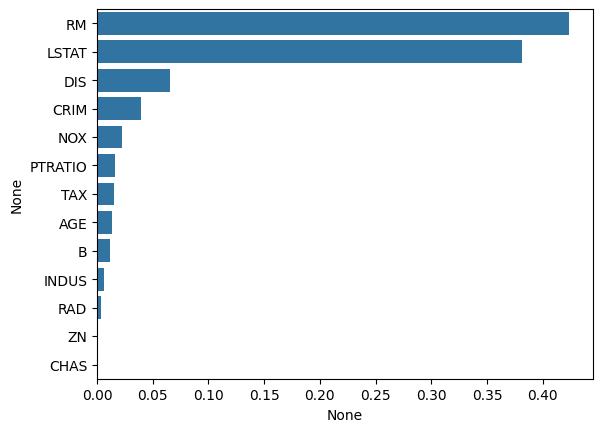

In [47]:
import seaborn as sns              # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨
%matplotlib inline
# Ï£ºÌîºÌÑ∞/ÏΩîÎû©ÏóêÏÑú Í∑∏ÎûòÌîÑ Î∞îÎ°ú Ï∂úÎ†•ÎêòÎèÑÎ°ù ÏÑ§Ï†ï

from sklearn.ensemble import RandomForestRegressor

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏÉùÏÑ± (Ìä∏Î¶¨ 1000Í∞ú ÏÇ¨Ïö©)
rf_reg = RandomForestRegressor(n_estimators=1000)

# Î™®Îç∏ ÌïôÏäµ (ÏûÖÎ†• ÌîºÏ≤ò X_dataÏôÄ ÌÉÄÍ≤üÍ∞í y_target ÏÇ¨Ïö©)
rf_reg.fit(X_data, y_target)

# Í∞Å ÌîºÏ≤òÏùò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú (Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ìï¥Îãπ ÌîºÏ≤òÍ∞Ä ÏòàÏ∏°Ïóê Îçî ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï§å)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)

# Ï§ëÏöîÎèÑÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
feature_series = feature_series.sort_values(ascending=False)

# Seaborn barplotÏùÑ Ïù¥Ïö©Ìï¥ Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
sns.barplot(x=feature_series, y=feature_series.index)


(100, 2)


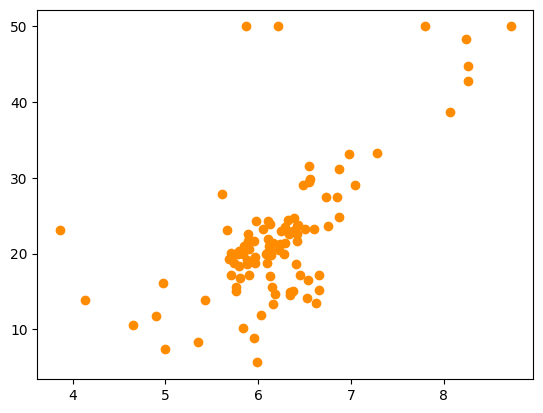

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

| ÌëúÌòÑ               | ÏùòÎØ∏                        |
| ---------------- | ------------------------- |
| `reshape(-1, 1)` | Ïó¥ 1Í∞úÏßúÎ¶¨ 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò         |
| `reshape(1, -1)` | Ìñâ 1Í∞úÏßúÎ¶¨ 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò (Í∞ÄÎ°ú Î≤°ÌÑ∞) |


In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Í≥º Í≤∞Ï†ï Ìä∏Î¶¨ ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± (Ìä∏Î¶¨ ÍπäÏù¥: 2, 7)
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Ï†ïÏùò: 4.5 ~ 8.5 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ 0.04 Í∞ÑÍ≤©ÏúºÎ°ú ÏÉùÏÑ± (100Í∞ú Ìè¨Ïù∏Ìä∏)
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# ÏûÖÎ†• Î≥ÄÏàòÎäî RM(ÌèâÍ∑† Î∞© Í∞úÏàò), ÌÉÄÍ≤ü Î≥ÄÏàòÎäî PRICE(ÏßëÍ∞í)
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# Î™®Îç∏ ÌïôÏäµ
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

# ÌÖåÏä§Ìä∏ Íµ¨Í∞ÑÏóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ
pred_lr = lr_reg.predict(X_test)    # ÏÑ†Ìòï ÌöåÍ∑Ä
pred_rf2 = rf_reg2.predict(X_test)  # Í≤∞Ï†ï Ìä∏Î¶¨ (ÍπäÏù¥ 2)
pred_rf7 = rf_reg7.predict(X_test)  # Í≤∞Ï†ï Ìä∏Î¶¨ (ÍπäÏù¥ 7)


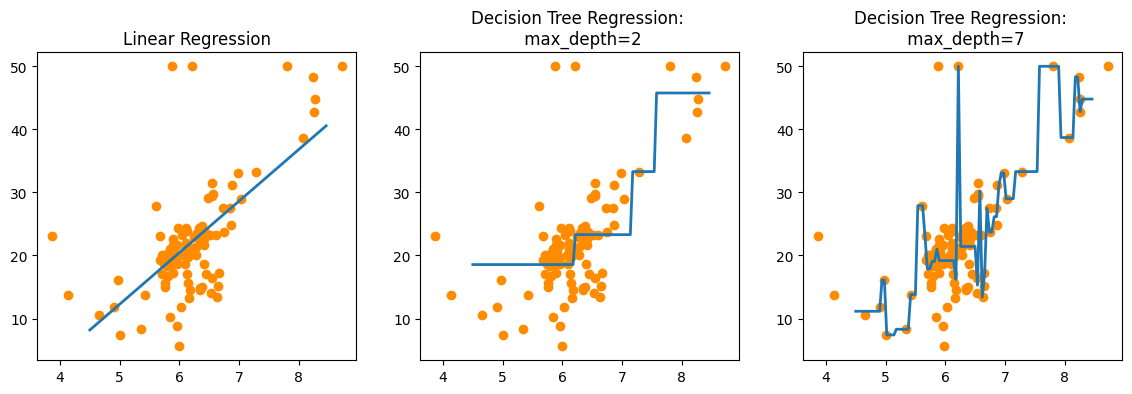

In [51]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# XÏ∂ïÍ∞íÏùÑ 4.5 ~ 8.5Î°ú Î≥ÄÌôòÌïòÎ©∞ ÏûÖÎ†•ÌñàÏùÑ Îïå, ÏÑ†Ìòï ÌöåÍ∑ÄÏôÄ Í≤∞Ï†ï Ìä∏Î¶¨ ÌöåÍ∑Ä ÏòàÏ∏° ÏÑ† ÏãúÍ∞ÅÌôî
# ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú ÌïôÏäµÎêú Î™®Îç∏ ÌöåÍ∑Ä ÏòàÏ∏°ÏÑ†
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressorÏùò max_depthÎ•º 2Î°ú ÌñàÏùÑ Îïå ÌöåÍ∑Ä ÏòàÏ∏°ÏÑ†
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressorÏùò max_depthÎ•º 7Î°ú ÌñàÏùÑ Îïå ÌöåÍ∑Ä ÏòàÏ∏°ÏÑ†
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Î™®Îç∏ Ï†ïÏùò
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 2. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ (Î∞© Í∞úÏàò RM ‚Üí Í∞ÄÍ≤© PRICE)
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 3. Î™®Îç∏ ÌïôÏäµ
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

# 4. RMSE Í≥ÑÏÇ∞ Ìï®Ïàò
def get_rmse(model, X, y_true):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(rmse, 3)

# 5. Î™®Îç∏Î≥Ñ RMSE Í≥ÑÏÇ∞
rmse_lr = get_rmse(lr_reg, X_feature, y_target)
rmse_dt2 = get_rmse(dt_reg2, X_feature, y_target)
rmse_dt7 = get_rmse(dt_reg7, X_feature, y_target)

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("üìä Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä):")
print(f"Linear Regression        : {rmse_lr}")
print(f"Decision Tree (depth=2)  : {rmse_dt2}")
print(f"Decision Tree (depth=7)  : {rmse_dt7}")


üìä Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä):
Linear Regression        : 6.817
Decision Tree (depth=2)  : 6.36
Decision Tree (depth=7)  : 2.891
